# Lab 2

## Utility functions

In [3]:
from typing import Callable
from matplotlib.pyplot import grid, plot, show
from numpy import linspace, array, copy, pi, ndarray


def sense(x):
    return x


def simulate(dt, x, dx):
    x += dt * dx
    return x


def create_plot(x: array, plotter: Callable[[float], array], tf: float = 2 * pi, dt: float = 0.1):
    x_log = [copy(x)]
    for t in linspace(0., tf, int(tf / dt) + 1):
        x_log.append(copy(plotter(t)))
    x_log = array(x_log)
    grid()
    plot(x_log[:, 0], x_log[:, 1], 'r--')
    show()

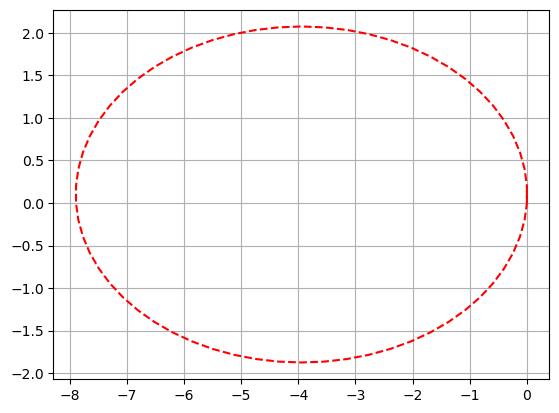

In [4]:
from math import sin, cos

def control(t, y):
    ux = -4 * sin(t)
    uy = 2 * cos(t)
    return array([ux, uy])

tf = 2 * pi
dt = 0.1
x = array([0., 0.])

def plotter(t):
    global x
    y = sense(x)
    u = control(t, y)
    x = simulate(dt, x, u)
    return x

create_plot(x, plotter, tf, dt)